# Deep Learning MNIST Example

## MNIST 개요
- MNIST 는 손으로 직접 쓴 흑백의 숫자 (필기체 숫자)들로 이루어진 데이터
- MNIST 데이터는 28x28 크기의 숫자 이미지와 0~9까지의 정답으로 이루어져있으며, 총 60,000개의 학습데이터와 10,000개의 테스트 데이터로 구성되어 있음.

## DL 개발 프로세스
- 데이터 정의 -> 데이터 전처리 -> 모델 구축 -> 모델 컴파일 -> 학습 -> 모델 평가

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, 
      ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, 
      ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력


 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]


train shape =  (60000, 28, 28)    28x28 , 총 6만개 데이터

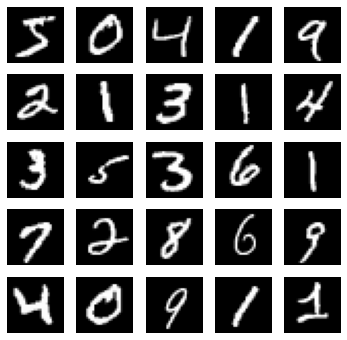

In [2]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   
    # plt.title(str(t_train[index]))

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

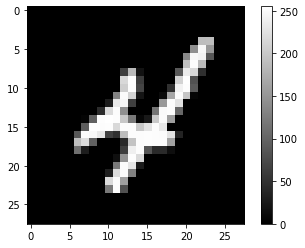

In [3]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show

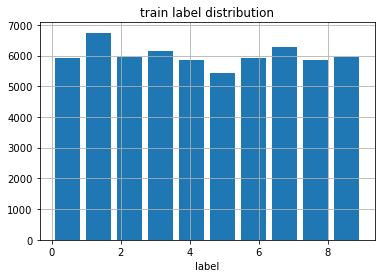

In [4]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')

plt.hist(t_train, bins=10, rwidth=0.8)

plt.show()

## 학습 데이터 정답 분포 확인

In [5]:
label_distribution = np.zeros(10)

for idx in range(len(t_train)):

    label = int(t_train[idx])

    label_distribution[label] = label_distribution[label] + 1


print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


## 학습 데이터 / 테스트 데이터 정규화 (Normalization)

In [6]:
x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test -0.0) / (255.0 - 0.0)

## 정답 데이터 원핫 인코딩 (One-Hot Encoding)

In [7]:
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

- MNIST 정답 데이터 0~9까지의 총 10개 숫자로 num_classes=10 지정하여 10개리스트를 만들어서 one-hot encoding 수행

In [8]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(90, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))\
: 28x28 크기/ 2차원 이미지를 784개의 1차원 벡터로 변환

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 90)                70650     
                                                                 
 dense_1 (Dense)             (None, 10)                910       
                                                                 
Total params: 71,560
Trainable params: 71,560
Non-trainable params: 0
_________________________________________________________________


- 정답을 원핫 인코딩 방식으로 나타냈기 때문에 loss='categorical_crossentropy'
- 원핫 인코딩이 아닌 경우 loss='sparse_categorical_crossentropy'로 지정

In [10]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3165 - accuracy: 0.9106 - val_loss: 0.1883 - val_accuracy: 0.9455
Epoch 2/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1487 - accuracy: 0.9563 - val_loss: 0.1466 - val_accuracy: 0.9581
Epoch 3/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1065 - accuracy: 0.9684 - val_loss: 0.1211 - val_accuracy: 0.9642
Epoch 4/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0813 - accuracy: 0.9755 - val_loss: 0.1148 - val_accuracy: 0.9669
Epoch 5/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0639 - accuracy: 0.9813 - val_loss: 0.1101 - val_accuracy: 0.9696
Epoch 6/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.1007 - val_accuracy: 0.9715
Epoch 7/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0420 - accuracy: 0.9879 - val_loss: 0.1021 - val_accuracy:

validation_split=0.3 \
: training data로부터 30% 비율로 validation data 생성 후 overfitting 확인

In [11]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 895us/step - loss: 0.1377 - accuracy: 0.9742


[0.13770931959152222, 0.9742000102996826]

## 손실 함수

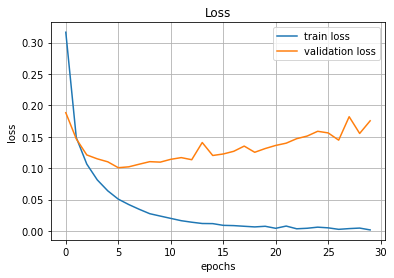

In [12]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

## 정확도
- 0.96부터 overfitting이 발생하는 것을 알 수 있음

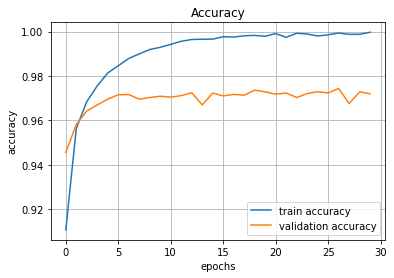

In [13]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

## 혼동 행렬 (confusion matrix)

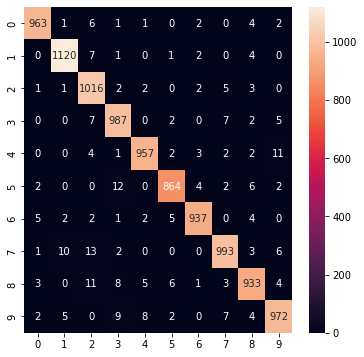

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [15]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

[[ 963    1    6    1    1    0    2    0    4    2]
 [   0 1120    7    1    0    1    2    0    4    0]
 [   1    1 1016    2    2    0    2    5    3    0]
 [   0    0    7  987    0    2    0    7    2    5]
 [   0    0    4    1  957    2    3    2    2   11]
 [   2    0    0   12    0  864    4    2    6    2]
 [   5    2    2    1    2    5  937    0    4    0]
 [   1   10   13    2    0    0    0  993    3    6]
 [   3    0   11    8    5    6    1    3  933    4]
 [   2    5    0    9    8    2    0    7    4  972]]


label = 0	(963/980)	accuracy = 0.983
label = 1	(1120/1135)	accuracy = 0.987
label = 2	(1016/1032)	accuracy = 0.984
label = 3	(987/1010)	accuracy = 0.977
label = 4	(957/982)	accuracy = 0.975
label = 5	(864/892)	accuracy = 0.969
label = 6	(937/958)	accuracy = 0.978
label = 7	(993/1028)	accuracy = 0.966
label = 8	(933/974)	accuracy = 0.958
label = 9	(972/1009)	accuracy = 0.963


In [16]:
# 정답 및 예측 값 분포 확인
label_distribution = np.zeros(10)
prediction_distribution = np.zeros(10)

for idx in range(len(t_test)):

    label = int(np.argmax(t_test[idx]))

    label_distribution[label] = label_distribution[label] + 1

    prediction = int(np.argmax(predicted_value[idx]))

    prediction_distribution[prediction] = prediction_distribution[prediction] + 1


print(label_distribution)
print(prediction_distribution)

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
[ 977. 1139. 1066. 1024.  975.  882.  951. 1019.  965. 1002.]
